In [1]:
import numpy as np
errors = []

# Function to calculate RMSE on nonzero values in the actual matrix
def non_zero_rmse_np(y_true,y_pred):
    counter = 0
    e = 0
    for i in range(len(y_true)):
        for j in range(len(y_true[i])):
            if y_true[i][j] > 0:
                counter = counter + 1
                e = e + pow(y_true[i][j] - y_pred[i][j], 2)
    e = np.sqrt(e/counter)
    return e

# Function to perform matrix factorization
def matrix_fac(U_R, P, Q, K, alpha=0.05, beta=0.05):
    epochs=20
    Q = Q.T
    for step in range(epochs):  # number of iterations
        for i in range(len(R)):  # iterating through each row
            for j in range(len(R[i])):  # iterating each element in the row i
                if R[i][j] > 0:  
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = non_zero_rmse_np(U_R,eR)
        errors.append(e)
        if e < 0.001:
            break
    return P, Q.T


In [2]:
# Actual Rating Matrix
# Users 1,3 and 5 are have similar ratings
# Users 2 and 4 have similar ratings 
# R = [
#      [5,4,4,1,1,3],
#      [1,2,2,4,4,5],
#      [5,4,4,1,1,3],
#      [1,2,2,4,4,5],
#      [5,4,4,1,1,3],
#     ]

# Training matrix
R = [
     [5,4,4,1,1,3],
     [0,2,0,4,4,5],
     [5,0,4,1,0,3],
     [1,2,2,4,4,5],
     [5,4,4,1,1,3],
    ]

# Test Matrix
Test = [
     [0,0,0,0,0,0],
     [1,0,2,0,0,0],
     [0,4,0,0,1,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0],
    ]
 
R = np.array(R)
 
N = len(R)
M = len(R[0])
K = 2
 
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
 
P, Q = matrix_fac(R, P, Q, K)
new_R = np.dot(P, Q.T)


In [3]:
new_R

array([[ 4.95198685,  3.93906257,  3.94280393,  0.99544217,  1.00066046,
         2.97882023],
       [ 1.0262859 ,  2.01434011,  2.01625225,  3.98094941,  3.9797994 ,
         4.97177633],
       [ 4.95576499,  3.94284328,  3.94658823,  0.99864476,  1.0038656 ,
         2.98391131],
       [ 1.02475992,  2.0129613 ,  2.01487214,  3.98012287,  3.97897156,
         4.97025877],
       [ 4.96228798,  3.94731315,  3.95106234,  0.99769101,  1.00292006,
         2.98522226]])

In [4]:
print("Train set RMSE", non_zero_rmse_np(R, new_R))
test_rmse = non_zero_rmse_np(Test, new_R)
print("Test set RMSE", test_rmse)


Train set RMSE 0.0317154146709
Test set RMSE 0.0325458037643


In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pylab 

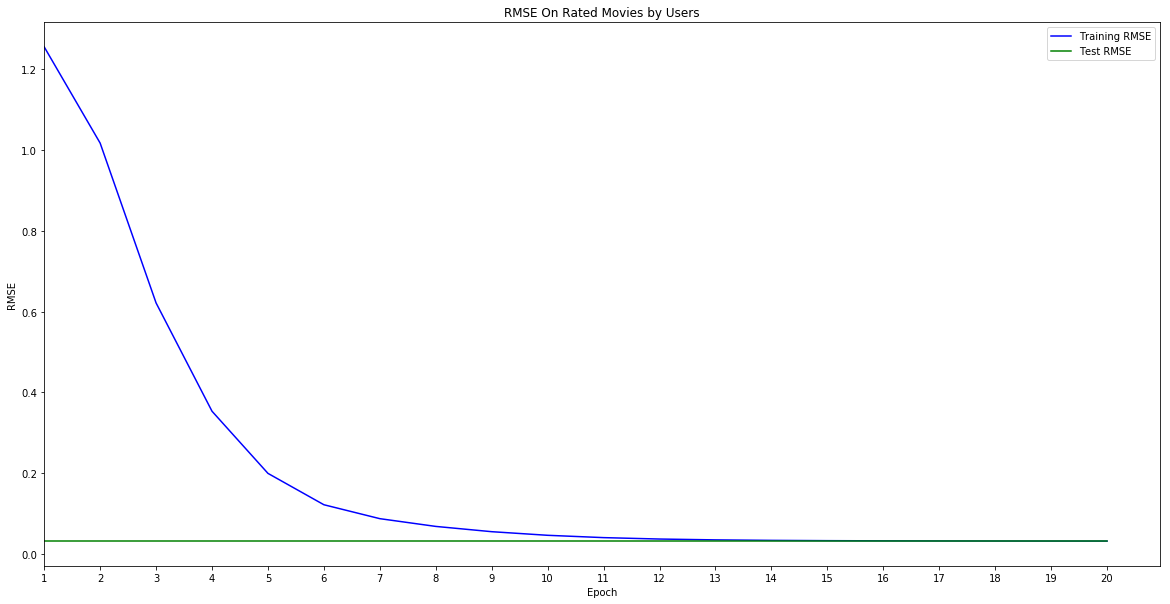

In [6]:
num_epoch = range(1,len(errors)+1)
test_error = [test_rmse for i in range(len(num_epoch))]

plt.figure(figsize=(20,10))
plt.plot(num_epoch, errors, 'b', label='Training RMSE')
plt.plot(num_epoch, test_error, 'g', label='Test RMSE')
pylab.legend(loc='upper right')
pylab.xlim(xmin=1)
plt.xticks(num_epoch)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE On Rated Movies by Users')
plt.show()